In [94]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [95]:
# Charger le fichier Excel
df_excel_complete = pd.read_excel('Proj_B1_consolidado_indicadores_Eloi_version.xlsx',)

# Sauvegarder le DataFrame en CSV
df_excel_complete.to_csv('Proj_B1_consolidado_indicadores_modifié.csv', index=False)

# Vérifier la conversion
df_excel_complete.head()


,DATE,TD_12M_Consolidado,TD_12M_Consolidado s/prod22,Proj_TD_12M_Consolidado,Proj_TD_12M_Consolidado 2,TD_12M_Consolidado actuel,GDP,Inflation,Unemployment_Rate,LT_Interest_Rate,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,201907.0,NaN,NaN,NaN,NaN,NaN,0.4,-0.7,6.6,0.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201908.0,NaN,NaN,NaN,NaN,NaN,0.4,-0.1,6.5,0.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201909.0,NaN,NaN,NaN,NaN,NaN,0.4,-0.3,6.6,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201910.0,NaN,NaN,NaN,NaN,NaN,0.8,-0.1,6.6,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201911.0,NaN,NaN,NaN,NaN,NaN,0.8,0.2,6.8,0.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df_excel_complete.columns

Index(['DATE', 'TD_12M_Consolidado', 'TD_12M_Consolidado s/prod22',
       'Proj_TD_12M_Consolidado', 'Proj_TD_12M_Consolidado 2',
       'TD_12M_Consolidado actuel', 'GDP', 'Inflation', 'Unemployment_Rate',
       'LT_Interest_Rate', 'ST_Interest_RateE3m', 'Euribor1year',
       'Unnamed: 12', 'Unnamed: 13', 'Idmes', 'Quarter', 'GDP.1',
       'Inflation.1', 'Unemployment_Rate.1', 'LT_Interest_Rate.1',
       'ST_Interest_Rate', 'Euribor1year.1', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35'],
      dtype='object')

In [97]:
# Sélections of necessary columns
columns_needed = ['DATE',
                  'TD_12M_Consolidado',
                  'GDP',
                  'Inflation',
                  'Unemployment_Rate',
                  'LT_Interest_Rate',
                  'ST_Interest_RateE3m',
                  'Euribor1year']

df_reduced=df_excel_complete[columns_needed]
df_reduced.head()


,DATE,TD_12M_Consolidado,GDP,Inflation,Unemployment_Rate,LT_Interest_Rate,ST_Interest_RateE3m,Euribor1year
0,201907.0,NaN,0.4,-0.7,6.6,0.44,-0.3649,-0.2833
1,201908.0,NaN,0.4,-0.1,6.5,0.17,-0.4077,-0.3563
2,201909.0,NaN,0.4,-0.3,6.6,0.20,-0.4176,-0.3391
3,201910.0,NaN,0.8,-0.1,6.6,0.19,-0.4129,-0.3042
4,201911.0,NaN,0.8,0.2,6.8,0.35,-0.4013,-0.2720


In [98]:
# Recharger la colonne DATE en string
df_excel_complete['DATE'] = df_excel_complete['DATE'].astype(str).str.replace('.0', '', regex=False)
df_excel_complete

,DATE,TD_12M_Consolidado,TD_12M_Consolidado s/prod22,Proj_TD_12M_Consolidado,Proj_TD_12M_Consolidado 2,TD_12M_Consolidado actuel,GDP,Inflation,Unemployment_Rate,LT_Interest_Rate,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,201907,NaN,NaN,NaN,NaN,NaN,0.40,-0.7,6.6,0.440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201908,NaN,NaN,NaN,NaN,NaN,0.40,-0.1,6.5,0.170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201909,NaN,NaN,NaN,NaN,NaN,0.40,-0.3,6.6,0.200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201910,NaN,NaN,NaN,NaN,NaN,0.80,-0.1,6.6,0.190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201911,NaN,NaN,NaN,NaN,NaN,0.80,0.2,6.8,0.350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,202609,NaN,NaN,0.041669,0.046641,0.075658,1.95,2.6,6.4,1.542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,202610,NaN,NaN,0.041428,0.046066,0.075658,1.97,2.6,6.4,1.507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,202611,NaN,NaN,0.041253,0.045077,0.075658,1.97,2.6,6.4,1.493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,202612,NaN,NaN,0.036705,0.044155,0.075658,1.97,2.6,6.4,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:

# Convertir la colonne DATE en datetime, en gérant le format 'YYYYMM'
df_excel_complete['DATE'] = pd.to_datetime(df_excel_complete['DATE'], format='%Y%m')

# Sélectionner les colonnes nécessaires
columns_needed = ['DATE', 'TD_12M_Consolidado', 'GDP', 'Inflation', 'Unemployment_Rate', 'LT_Interest_Rate', 'ST_Interest_RateE3m', 'Euribor1year']
df_reduced = df_excel_complete[columns_needed]

# Mettre la colonne DATE en index
df_reduced = df_reduced.set_index('DATE')

In [100]:
df_reduced.index = pd.to_datetime(df_reduced.index)
df_reduced

,TD_12M_Consolidado,GDP,Inflation,Unemployment_Rate,LT_Interest_Rate,ST_Interest_RateE3m,Euribor1year
DATE,,,,,,,
2019-07-01,NaN,0.40,-0.7,6.6,0.440,-0.3649,-0.2833
2019-08-01,NaN,0.40,-0.1,6.5,0.170,-0.4077,-0.3563
2019-09-01,NaN,0.40,-0.3,6.6,0.200,-0.4176,-0.3391
2019-10-01,NaN,0.80,-0.1,6.6,0.190,-0.4129,-0.3042
2019-11-01,NaN,0.80,0.2,6.8,0.350,-0.4013,-0.2720
...,...,...,...,...,...,...,...
2026-09-01,NaN,1.95,2.6,6.4,1.542,2.3,1.5270
2026-10-01,NaN,1.97,2.6,6.4,1.507,2.3,1.4350
2026-11-01,NaN,1.97,2.6,6.4,1.493,2.3,1.3600


In [104]:
#Filtrer les données connues (jusqu'à juillet 2025 inclus)
df_known = df_reduced.loc[:pd.Timestamp('2025-07')]

# Séparation train/test sur les données connues
train_size = int(len(df_known) * 0.8)
train, test = df_known[:train_size], df_known[train_size:]
train = train.dropna()
# Données à prédire (après juillet 2025)
df_forecast = df_reduced.loc['2025-08':]

# Vérification
print(train.shape, test.shape)
print(df_forecast.shape)

(46, 7) (15, 7)
(17, 7)


In [105]:
df_known

,TD_12M_Consolidado,GDP,Inflation,Unemployment_Rate,LT_Interest_Rate,ST_Interest_RateE3m,Euribor1year
DATE,,,,,,,
2019-07-01,NaN,0.4,-0.7,6.6,0.44,-0.3649,-0.2833
2019-08-01,NaN,0.4,-0.1,6.5,0.17,-0.4077,-0.3563
2019-09-01,NaN,0.4,-0.3,6.6,0.20,-0.4176,-0.3391
2019-10-01,NaN,0.8,-0.1,6.6,0.19,-0.4129,-0.3042
2019-11-01,NaN,0.8,0.2,6.8,0.35,-0.4013,-0.2720
...,...,...,...,...,...,...,...
2025-03-01,0.054384,-0.4,1.9,6.6,3.29,2.44,2.4000
2025-04-01,0.056576,0.6,2.1,5.9,3.11,2.25,2.1400
2025-05-01,0.060178,0.6,1.7,5.9,3.08,2.09,2.0800


In [107]:
#definir X et y pour l'entrainement du modele
features = ['GDP', 'Inflation', 'Unemployment_Rate', 'LT_Interest_Rate', 'ST_Interest_RateE3m', 'Euribor1year']
X_train = train[features]
y_train = train['TD_12M_Consolidado']
X_test = test[features]
y_test = test['TD_12M_Consolidado']


In [108]:
X_train

,GDP,Inflation,Unemployment_Rate,LT_Interest_Rate,ST_Interest_RateE3m,Euribor1year
DATE,,,,,,
2020-07-01,14.4,-0.1,8.2,0.40,-0.4441,-0.2789
2020-08-01,14.4,-0.2,8.3,0.36,-0.4797,-0.3589
2020-09-01,14.4,-0.8,8.1,0.32,-0.4914,-0.4146
2020-10-01,0.2,-0.6,7.6,0.18,-0.5091,-0.4660
2020-11-01,0.2,-0.4,7.2,0.07,-0.5209,-0.4806
2020-12-01,0.2,-0.3,6.9,0.03,-0.5381,-0.4966
2021-01-01,-2.8,0.2,7.0,0.03,-0.5472,-0.5047
2021-02-01,-2.8,0.3,7.0,0.16,-0.5411,-0.5009
2021-03-01,-2.8,0.1,6.8,0.23,-0.5391,-0.4867


In [121]:

# create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
from sklearn.metrics import root_mean_squared_error
print("mean_squared_error:", root_mean_squared_error(y_test, y_pred))

mean_squared_error: 0.0061710134247632935


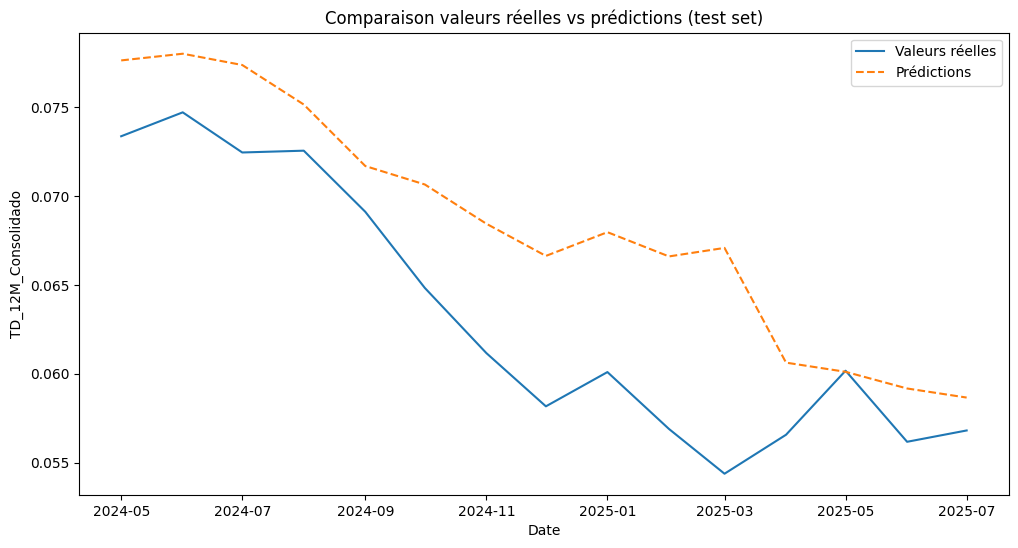

In [110]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Valeurs réelles')
plt.plot(y_test.index, y_pred, label='Prédictions', linestyle='--')
plt.xlabel('Date')
plt.ylabel('TD_12M_Consolidado')
plt.title('Comparaison valeurs réelles vs prédictions (test set)')
plt.legend()
plt.show()

In [111]:
df_comparaison = pd.DataFrame({
    'Valeurs réelles': y_test,
    'Valeurs prédites': y_pred
}, index=y_test.index)

df_comparaison

,Valeurs réelles,Valeurs prédites
DATE,,
2024-05-01,0.073365,0.077631
2024-06-01,0.074710,0.078007
2024-07-01,0.072452,0.077372
2024-08-01,0.072553,0.075150
2024-09-01,0.069116,0.071690
2024-10-01,0.064833,0.070652
2024-11-01,0.061169,0.068444
2024-12-01,0.058175,0.066635
2025-01-01,0.060101,0.067970


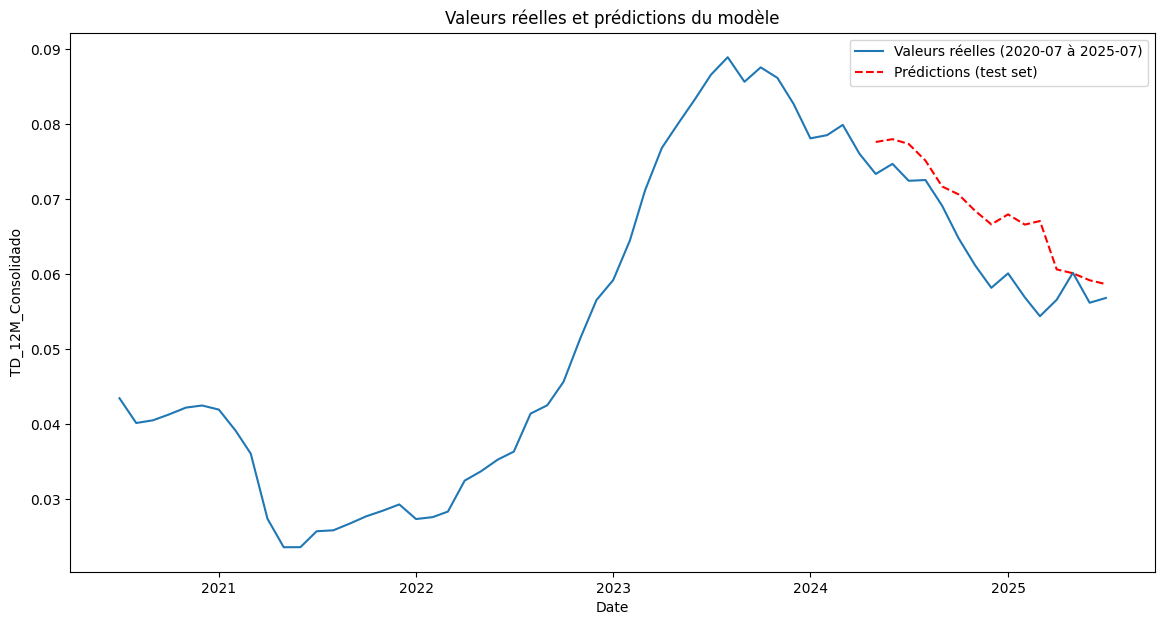

In [112]:
plt.figure(figsize=(14,7))
# Toutes les valeurs réelles connues
plt.plot(df_known.index, df_known['TD_12M_Consolidado'], label='Valeurs réelles (2020-07 à 2025-07)')
# Les prédictions sur le test set
plt.plot(y_test.index, y_pred, label='Prédictions (test set)', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('TD_12M_Consolidado')
plt.title('Valeurs réelles et prédictions du modèle')
plt.legend()
plt.show()

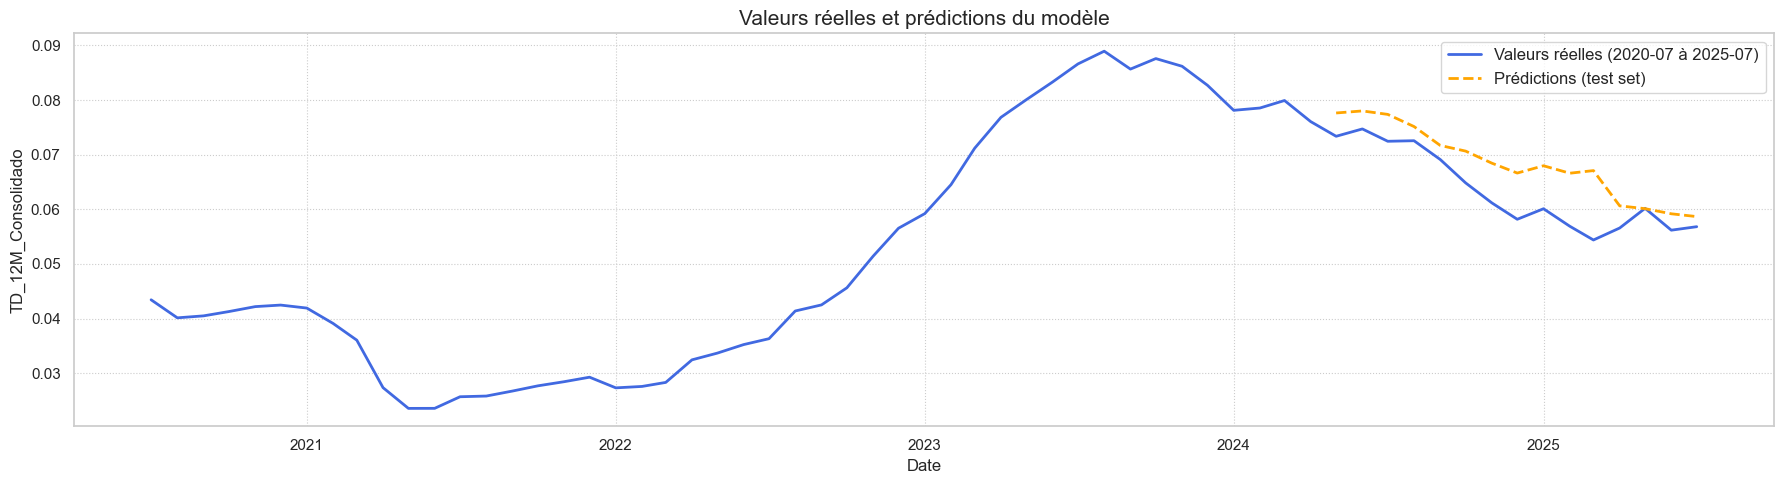

In [113]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(18,5))  # Format plus large et moins haut

# Toutes les valeurs réelles connues
plt.plot(df_known.index, df_known['TD_12M_Consolidado'], label='Valeurs réelles (2020-07 à 2025-07)', color='royalblue', linewidth=2)
# Les prédictions sur le test set
plt.plot(y_test.index, y_pred, label='Prédictions (test set)', linestyle='--', color='orange', linewidth=2)

plt.xlabel('Date', fontsize=12)
plt.ylabel('TD_12M_Consolidado', fontsize=12)
plt.title('Valeurs réelles et prédictions du modèle', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True, which='major', linestyle=':', linewidth=0.8)
plt.tight_layout()
plt.show()

### Fin de l'entrainement du modèle, maintenant prédictions pour l'année 2026

In [115]:
# Préparer les features pour la prédiction
X_future = df_forecast[features]

# Prédire avec le modèle entraîné
y_pred_future = model.predict(X_future)

# Créer un DataFrame pour visualiser les prédictions
df_pred_future = pd.DataFrame({
    'Date': X_future.index,
    'Prédiction TD_12M_Consolidado': y_pred_future
})
df_pred_future.set_index('Date', inplace=True)

# Afficher les résultats
df_pred_future

,Prédiction TD_12M_Consolidado
Date,
2025-08-01,0.060465
2025-09-01,0.060120
2025-10-01,0.058892
2025-11-01,0.059153
2025-12-01,0.058211
2026-01-01,0.061735
2026-02-01,0.060671
2026-03-01,0.060065
2026-04-01,0.059238


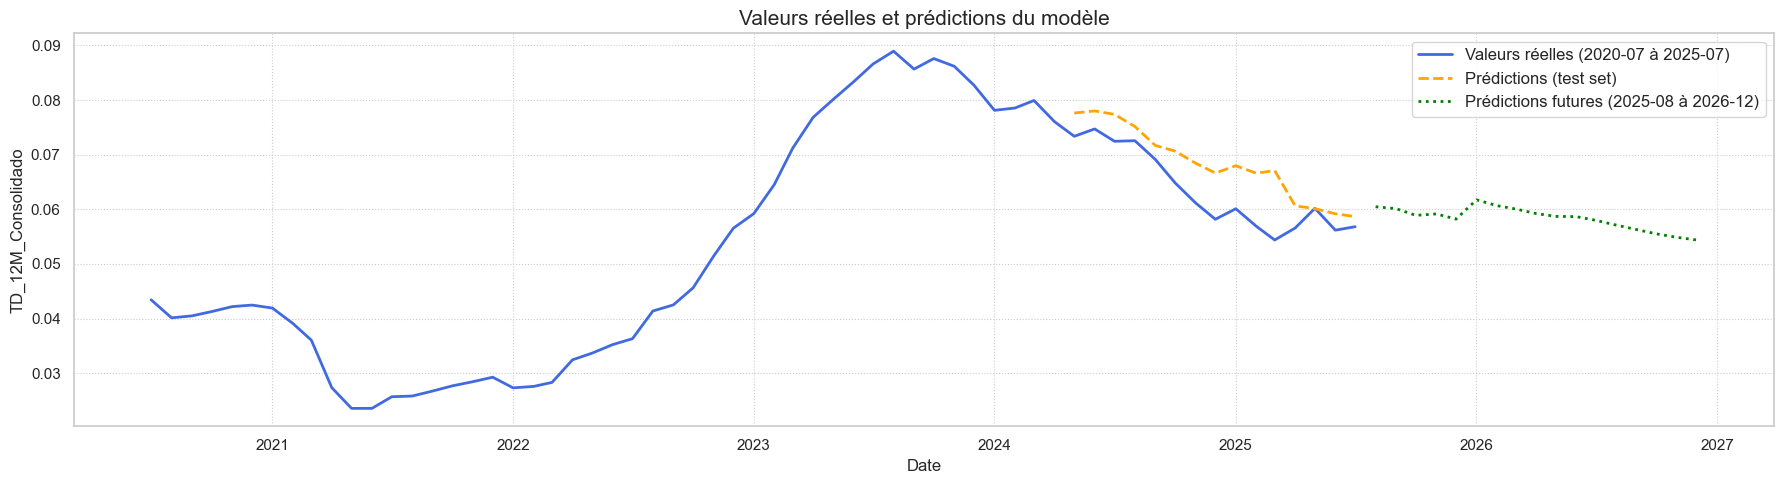

In [118]:


sns.set(style="whitegrid")
plt.figure(figsize=(18,5))  # Format plus large et moins haut

# Toutes les valeurs réelles connues
plt.plot(df_known.index, df_known['TD_12M_Consolidado'], label='Valeurs réelles (2020-07 à 2025-07)', color='royalblue', linewidth=2)
# Les prédictions sur le test set
plt.plot(y_test.index, y_pred, label='Prédictions (test set)', linestyle='--', color='orange', linewidth=2)
# Les prédictions futures
plt.plot(df_pred_future.index, df_pred_future['Prédiction TD_12M_Consolidado'], label='Prédictions futures (2025-08 à 2026-12)', linestyle=':', color='green', linewidth=2)

plt.xlabel('Date', fontsize=12)
plt.ylabel('TD_12M_Consolidado', fontsize=12)
plt.title('Valeurs réelles et prédictions du modèle', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True, which='major', linestyle=':', linewidth=0.8)
plt.tight_layout()
plt.show()